In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
import os



In [264]:
csv_path_CHR = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\CHR\*.csv'
csv_path_HC = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\HC\*.csv'

In [265]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
from bokeh.layouts import gridplot

# Set the output mode to notebook
output_notebook()

# Prepare the data for plotting
numerical_feats = ['left_arm_angle', 'right_arm_angle']
categorical_feats = ['leaning', 'head_horizontal', 'head_vertical']

# Function to extract video ID from file name
def extract_video_id(file_path):
    file_name = os.path.basename(file_path)
    video_id = file_name.split('-cut')[0]
    return video_id

# Retrieve the file paths of the CSV files in CHR directory

csv_files_CHR = glob.glob(csv_path_CHR)
video_ids_CHR = [extract_video_id(file_path) for file_path in csv_files_CHR]

# Retrieve the file paths of the CSV files in HC directory

csv_files_HC = glob.glob(csv_path_HC)
video_ids_HC = [extract_video_id(file_path) for file_path in csv_files_HC]

# Function to load CSV files and add 'video_id' column
def load_csv_files(csv_files):
    dfs = []
    for file_path in csv_files:
        video_id = extract_video_id(file_path)
        df = pd.read_csv(file_path)
        df['video_id'] = video_id
        dfs.append(df)
    return pd.concat(dfs)

# Load CHR CSV files
dfCHR = load_csv_files(csv_files_CHR)

# Load HC CSV files
dfHC = load_csv_files(csv_files_HC)



Loading BokehJS ...

In [266]:
dfCHR.head(5)

,time_in_seconds,frame,total_movement_per_second,pose_openness,leaning,head_horizontal,head_vertical,left_arm_angle,left_arm_v_movement,left_arm_h_movement,right_arm_angle,right_arm_v_movement,right_arm_h_movement,left_hand_orientation,left_hand_state,right_hand_orientation,right_hand_state,video_id
0,1.0,59,0.747253,1.269288,Backward,RIGHT,UP,46.726666,NaN,FORWARD,166.624043,DOWN,FORWARD,Up,OPEN,Down,OPEN,11002
1,2.0,118,0.973431,1.706235,Backward,STILL,STILL,117.085253,NaN,FORWARD,14.155853,UP,FORWARD,Down,OPEN,Up,OPEN,11002
2,3.0,177,0.462014,2.024878,Backward,STILL,DOWN,134.653012,NaN,FORWARD,37.626086,UP,FORWARD,Down,OPEN,Up,OPEN,11002
3,4.0,236,1.200471,1.769531,Backward,RIGHT,UP,163.340850,DOWN,FORWARD,169.535589,DOWN,FORWARD,Down,OPEN,Down,OPEN,11002
4,5.0,295,1.162800,1.579140,Backward,STILL,STILL,102.979495,DOWN,FORWARD,178.661209,DOWN,FORWARD,Down,OPEN,Down,OPEN,11002


In [267]:
# Drop NaN values from the DataFrame
dfCHR.dropna(inplace=True)
dfHC.dropna(inplace=True)

In [268]:
!pip install bokeh

In [269]:
# Define the folder paths
chr_folder = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\CHR'
hc_folder = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles\HC'

# Define the colors for CHR and HC line plots
chr_color = 'blue'
hc_color = 'red'

In [270]:
# Create a Bokeh figure for 'pose_openness'
p1 = figure(title='Pose Openness', x_axis_label='Time (seconds)', y_axis_label='Average Openness')

# Calculate average pose openness for CHR group
avg_pose_openness_chr = dfCHR.groupby('time_in_seconds')['pose_openness'].mean().reset_index()

# Calculate average pose openness for HC group
avg_pose_openness_hc = dfHC.groupby('time_in_seconds')['pose_openness'].mean().reset_index()

# Plot averaged time series for pose openness - CHR group
p1.line(avg_pose_openness_chr['time_in_seconds'], avg_pose_openness_chr['pose_openness'], color='red', legend_label='CHR')

# Plot averaged time series for pose openness - HC group
p1.line(avg_pose_openness_hc['time_in_seconds'], avg_pose_openness_hc['pose_openness'], color='blue', legend_label='HC')

# Create a Bokeh figure for 'total_movement_per_second'
p2 = figure(title='Total Movement per Second', x_axis_label='Time (seconds)', y_axis_label='Average Movement')

# Calculate average total movement per second for CHR group
avg_movement_chr = dfCHR.groupby('time_in_seconds')['total_movement_per_second'].mean().reset_index()

# Calculate average total movement per second for HC group
avg_movement_hc = dfHC.groupby('time_in_seconds')['total_movement_per_second'].mean().reset_index()

# Plot averaged time series for total movement per second - CHR group
p2.line(avg_movement_chr['time_in_seconds'], avg_movement_chr['total_movement_per_second'], color='red', legend_label='CHR')

# Plot averaged time series for total movement per second - HC group
p2.line(avg_movement_hc['time_in_seconds'], avg_movement_hc['total_movement_per_second'], color='blue', legend_label='HC')

# Arrange the two figures side by side
grid = gridplot([[p1, p2]])

# Show the plot
output_notebook()
show(grid)


Loading BokehJS ...

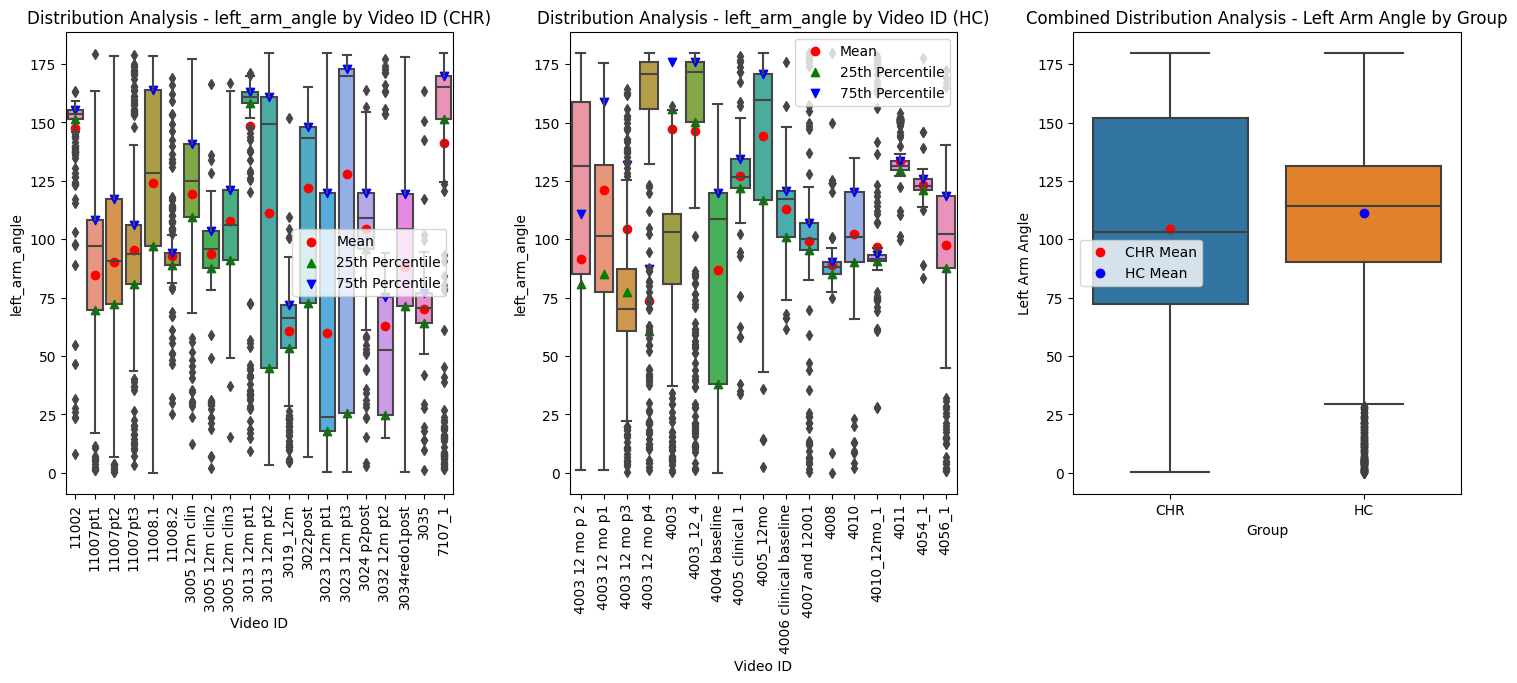


Group Statistics:
                 mean        25%         75%
group                                       
CHR Group  104.416802  72.204868  151.975265
HC Group   111.338065  90.424108  131.394302


In [271]:
# Define the folder paths
csv_folder = r'C:\Users\rcz8260\Desktop\AANCHAL\CSVs and videos\csvfiles'
chr_folder = os.path.join(csv_folder, 'CHR')
hc_folder = os.path.join(csv_folder, 'HC')

# Function to extract video ID from file name
def extract_video_id(file):
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    # Extract the video ID before '-cut' portion
    video_id = file_name.split('-cut')[0]
    return video_id

# Function to create distribution analysis box plot for a group
def create_distribution_analysis_box_plot(folder, column, group_label, ax):
    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder, '*.csv'))

    # Create an empty list to store the dataframes
    dataframes = []

    # Read each CSV file, assign video ID, and append its dataframe to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df['video_id'] = extract_video_id(file)
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dataframes)

    # Group by video ID and calculate mean and percentiles
    group_stats = combined_df.groupby('video_id')[column].describe()[['mean', '25%', '75%']]

    # Plotting
    sns.boxplot(x='video_id', y=column, data=combined_df, ax=ax)
    ax.scatter(group_stats.index, group_stats['mean'], marker='o', color='red', label='Mean')
    ax.scatter(group_stats.index, group_stats['25%'], marker='^', color='green', label='25th Percentile')
    ax.scatter(group_stats.index, group_stats['75%'], marker='v', color='blue', label='75th Percentile')
    ax.set_xlabel('Video ID')
    ax.set_ylabel(column)
    ax.set_title(f'Distribution Analysis - {column} by Video ID ({group_label})')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend()

# Create subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create distribution analysis box plot for CHR group - left_arm_angle
create_distribution_analysis_box_plot(chr_folder, 'left_arm_angle', 'CHR', ax=axes[0])

# Create distribution analysis box plot for HC group - left_arm_angle
create_distribution_analysis_box_plot(hc_folder, 'left_arm_angle', 'HC', ax=axes[1])

# Combine both CHR and HC groups for distribution analysis - left_arm_angle
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Combine both CHR and HC groups for distribution analysis - left_arm_angle
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Calculate the mean of each group
chr_mean = chr_combined_df['left_arm_angle'].mean()
hc_mean = hc_combined_df['left_arm_angle'].mean()

# Plotting combined graph with mean values
sns.boxplot(data=combined_df, x='group', y='left_arm_angle', ax=axes[2])
axes[2].scatter([0], [chr_mean], marker='o', color='red', label='CHR Mean')
axes[2].scatter([1], [hc_mean], marker='o', color='blue', label='HC Mean')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Left Arm Angle')
axes[2].set_title('Combined Distribution Analysis - Left Arm Angle by Group')
axes[2].legend()


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

# Group statistics
group_stats = combined_df.groupby('group')['left_arm_angle'].describe()[['mean', '25%', '75%']]
group_stats = group_stats.rename(index={'CHR': 'CHR Group', 'HC': 'HC Group'})

# Print group statistics
print("\nGroup Statistics:")
print(group_stats)


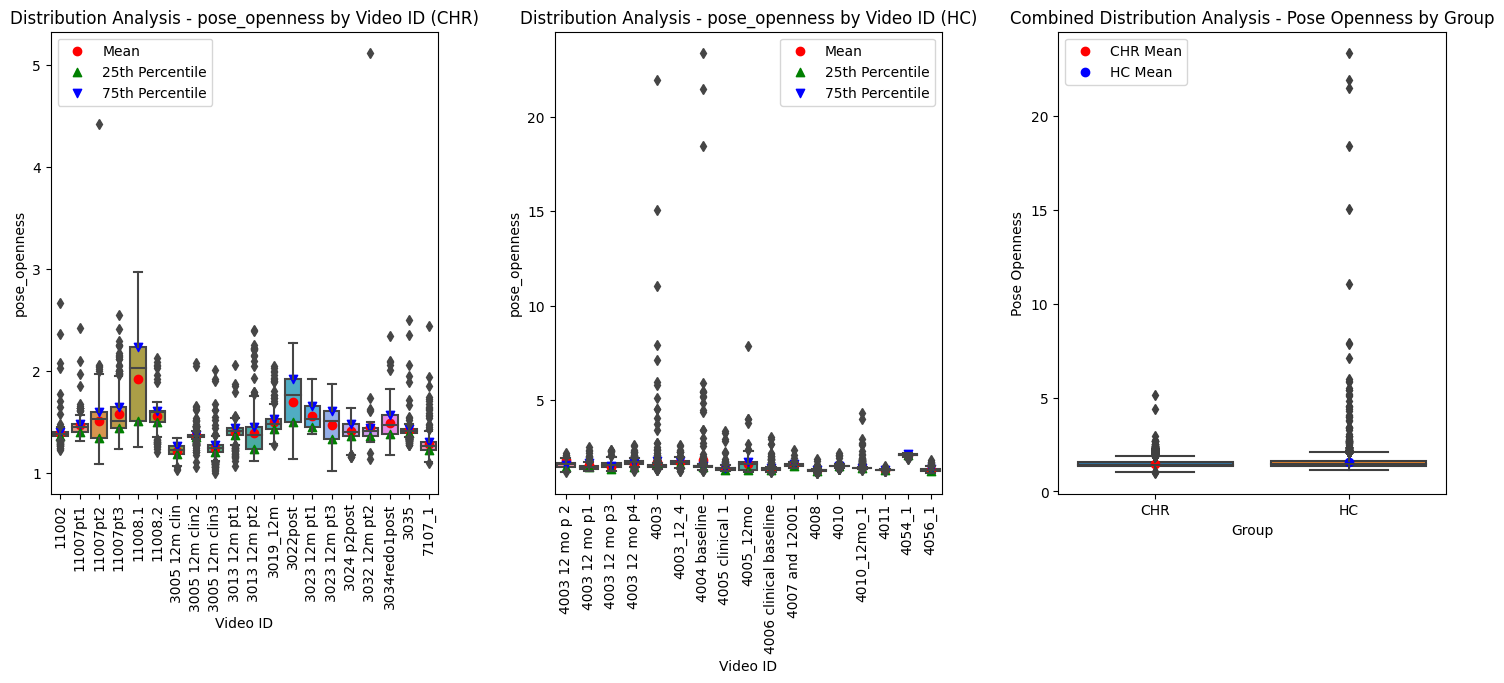


Group Statistics:
               mean       25%       75%
group                                  
CHR Group  1.472675  1.348042  1.555109
HC Group   1.564355  1.348541  1.639668


In [272]:
# Function to create distribution analysis box plot for a group
def create_distribution_analysis_box_plot(folder, column, group_label, ax):
    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder, '*.csv'))

    # Create an empty list to store the dataframes
    dataframes = []

    # Read each CSV file, assign video ID, and append its dataframe to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df['video_id'] = extract_video_id(file)
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dataframes)

    # Group by video ID and calculate mean and percentiles
    group_stats = combined_df.groupby('video_id')[column].describe()[['mean', '25%', '75%']]

    # Plotting
    sns.boxplot(x='video_id', y=column, data=combined_df, ax=ax)
    ax.scatter(group_stats.index, group_stats['mean'], marker='o', color='red', label='Mean')
    ax.scatter(group_stats.index, group_stats['25%'], marker='^', color='green', label='25th Percentile')
    ax.scatter(group_stats.index, group_stats['75%'], marker='v', color='blue', label='75th Percentile')
    ax.set_xlabel('Video ID')
    ax.set_ylabel(column)
    ax.set_title(f'Distribution Analysis - {column} by Video ID ({group_label})')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend()

# Create subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create distribution analysis box plot for CHR group - pose_openness
create_distribution_analysis_box_plot(chr_folder, 'pose_openness', 'CHR', ax=axes[0])

# Create distribution analysis box plot for HC group - pose_openness
create_distribution_analysis_box_plot(hc_folder, 'pose_openness', 'HC', ax=axes[1])

# Combine both CHR and HC groups for distribution analysis - pose_openness
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Calculate the mean of each group
chr_mean = chr_combined_df['pose_openness'].mean()
hc_mean = hc_combined_df['pose_openness'].mean()

# Plotting combined graph with mean values
sns.boxplot(data=combined_df, x='group', y='pose_openness', ax=axes[2])
axes[2].scatter([0], [chr_mean], marker='o', color='red', label='CHR Mean')
axes[2].scatter([1], [hc_mean], marker='o', color='blue', label='HC Mean')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Pose Openness')
axes[2].set_title('Combined Distribution Analysis - Pose Openness by Group')
axes[2].legend()


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

# Group statistics
group_stats = combined_df.groupby('group')['pose_openness'].describe()[['mean', '25%', '75%']]
group_stats = group_stats.rename(index={'CHR': 'CHR Group', 'HC': 'HC Group'})

# Print group statistics
print("\nGroup Statistics:")
print(group_stats)


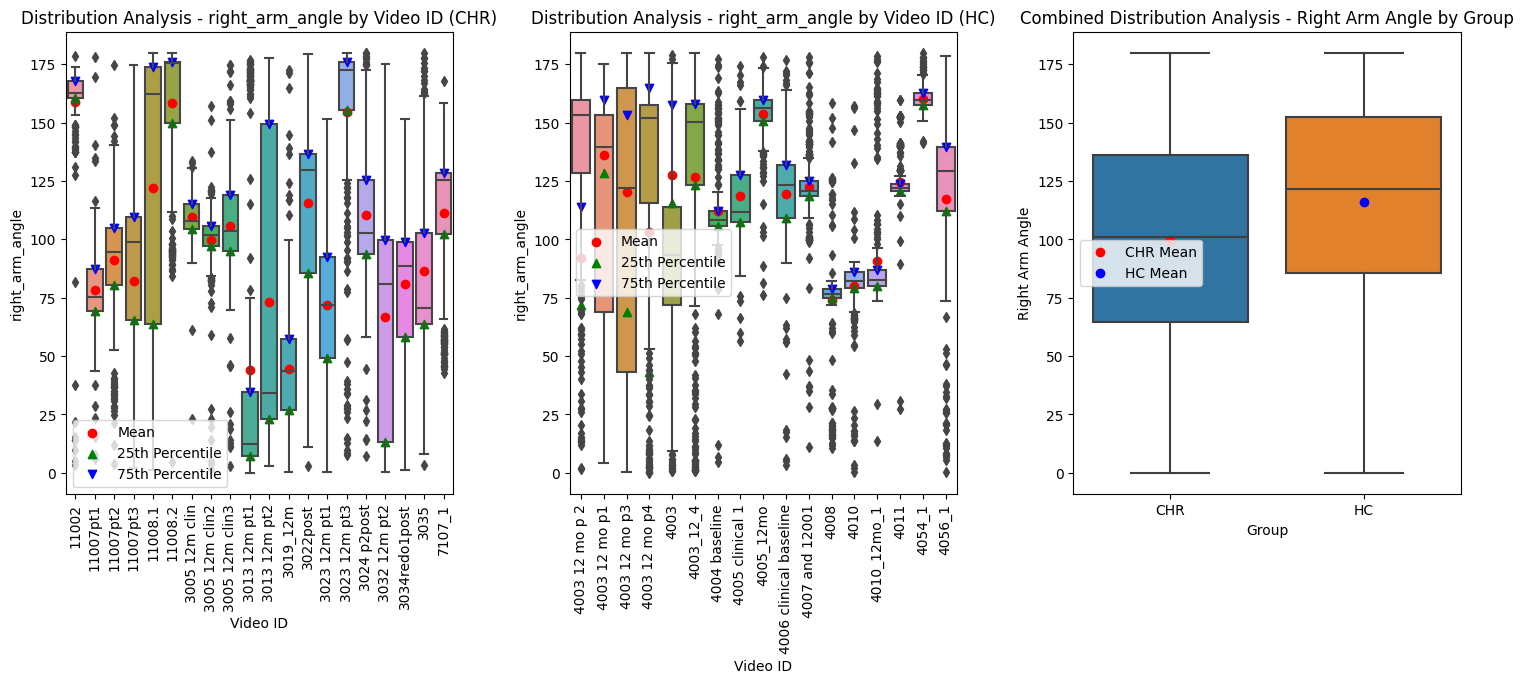


Group Statistics:
                 mean        25%         75%
group                                       
CHR Group   99.782882  64.540729  136.292478
HC Group   116.176078  85.735474  152.338677


In [273]:
# Function to extract video ID from file name
def extract_video_id(file):
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    # Extract the video ID before '-cut' portion
    video_id = file_name.split('-cut')[0]
    return video_id

# Function to create distribution analysis box plot for a group
def create_distribution_analysis_box_plot(folder, column, group_label, ax):
    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder, '*.csv'))

    # Create an empty list to store the dataframes
    dataframes = []

    # Read each CSV file, assign video ID, and append its dataframe to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df['video_id'] = extract_video_id(file)
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dataframes)

    # Group by video ID and calculate mean and percentiles
    group_stats = combined_df.groupby('video_id')[column].describe()[['mean', '25%', '75%']]

    # Plotting
    sns.boxplot(x='video_id', y=column, data=combined_df, ax=ax)
    ax.scatter(group_stats.index, group_stats['mean'], marker='o', color='red', label='Mean')
    ax.scatter(group_stats.index, group_stats['25%'], marker='^', color='green', label='25th Percentile')
    ax.scatter(group_stats.index, group_stats['75%'], marker='v', color='blue', label='75th Percentile')
    ax.set_xlabel('Video ID')
    ax.set_ylabel(column)
    ax.set_title(f'Distribution Analysis - {column} by Video ID ({group_label})')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend()

# Create subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create distribution analysis box plot for CHR group - right_arm_angle
create_distribution_analysis_box_plot(chr_folder, 'right_arm_angle', 'CHR', ax=axes[0])

# Create distribution analysis box plot for HC group - right_arm_angle
create_distribution_analysis_box_plot(hc_folder, 'right_arm_angle', 'HC', ax=axes[1])

# Combine both CHR and HC groups for distribution analysis - right_arm_angle
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Calculate the mean of each group
chr_mean = chr_combined_df['right_arm_angle'].mean()
hc_mean = hc_combined_df['right_arm_angle'].mean()

# Plotting combined graph with mean values
sns.boxplot(data=combined_df, x='group', y='right_arm_angle', ax=axes[2])
axes[2].scatter([0], [chr_mean], marker='o', color='red', label='CHR Mean')
axes[2].scatter([1], [hc_mean], marker='o', color='blue', label='HC Mean')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Right Arm Angle')
axes[2].set_title('Combined Distribution Analysis - Right Arm Angle by Group')
axes[2].legend()


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

# Group statistics
group_stats = combined_df.groupby('group')['right_arm_angle'].describe()[['mean', '25%', '75%']]
group_stats = group_stats.rename(index={'CHR': 'CHR Group', 'HC': 'HC Group'})

# Print group statistics
print("\nGroup Statistics:")
print(group_stats)


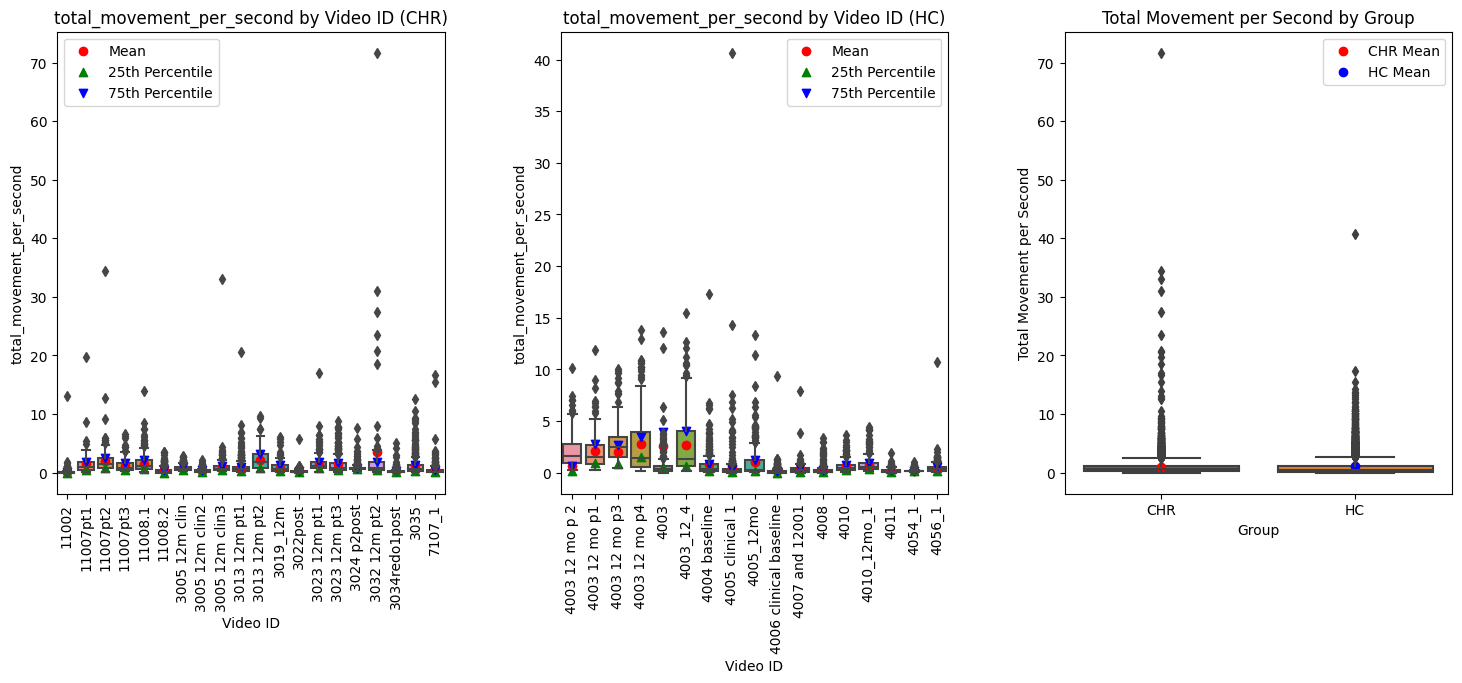


Group Statistics:
               mean       25%       75%
group                                  
CHR Group  1.013868  0.233903  1.160859
HC Group   1.072418  0.158190  1.171905


In [274]:
# Function to extract video ID from file name
def extract_video_id(file):
    # Extract the file name without the extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    # Extract the video ID before '-cut' portion
    video_id = file_name.split('-cut')[0]
    return video_id

# Function to create distribution analysis box plot for a group
def create_distribution_analysis_box_plot(folder, column, group_label, ax):
    # Get a list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder, '*.csv'))

    # Create an empty list to store the dataframes
    dataframes = []

    # Read each CSV file, assign video ID, and append its dataframe to the list
    for file in csv_files:
        df = pd.read_csv(file)
        df['video_id'] = extract_video_id(file)
        dataframes.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dataframes)

    # Group by video ID and calculate mean and percentiles
    group_stats = combined_df.groupby('video_id')[column].describe()[['mean', '25%', '75%']]

    # Plotting
    sns.boxplot(x='video_id', y=column, data=combined_df, ax=ax)
    ax.scatter(group_stats.index, group_stats['mean'], marker='o', color='red', label='Mean')
    ax.scatter(group_stats.index, group_stats['25%'], marker='^', color='green', label='25th Percentile')
    ax.scatter(group_stats.index, group_stats['75%'], marker='v', color='blue', label='75th Percentile')
    ax.set_xlabel('Video ID')
    ax.set_ylabel(column)
    ax.set_title(f'{column} by Video ID ({group_label})')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend()

# Create subplots for all three graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create distribution analysis box plot for CHR group - total_movement_per_second
create_distribution_analysis_box_plot(chr_folder, 'total_movement_per_second', 'CHR', ax=axes[0])

# Create distribution analysis box plot for HC group - total_movement_per_second
create_distribution_analysis_box_plot(hc_folder, 'total_movement_per_second', 'HC', ax=axes[1])

# Combine both CHR and HC groups for distribution analysis - total_movement_per_second
# Get dataframes for CHR and HC groups
chr_dataframes = []
hc_dataframes = []

for file in glob.glob(os.path.join(chr_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    chr_dataframes.append(df)

for file in glob.glob(os.path.join(hc_folder, '*.csv')):
    df = pd.read_csv(file)
    df['video_id'] = extract_video_id(file)
    hc_dataframes.append(df)

chr_combined_df = pd.concat(chr_dataframes)
hc_combined_df = pd.concat(hc_dataframes)

# Calculate the mean of each group
chr_mean = chr_combined_df['total_movement_per_second'].mean()
hc_mean = hc_combined_df['total_movement_per_second'].mean()

# Plotting combined graph with mean values
sns.boxplot(data=combined_df, x='group', y='total_movement_per_second', ax=axes[2])
axes[2].scatter([0], [chr_mean], marker='o', color='red', label='CHR Mean')
axes[2].scatter([1], [hc_mean], marker='o', color='blue', label='HC Mean')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Total Movement per Second')
axes[2].set_title('Total Movement per Second by Group')
axes[2].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

# Group statistics
group_stats = combined_df.groupby('group')['total_movement_per_second'].describe()[['mean', '25%', '75%']]
group_stats = group_stats.rename(index={'CHR': 'CHR Group', 'HC': 'HC Group'})

# Print group statistics
print("\nGroup Statistics:")
print(group_stats)


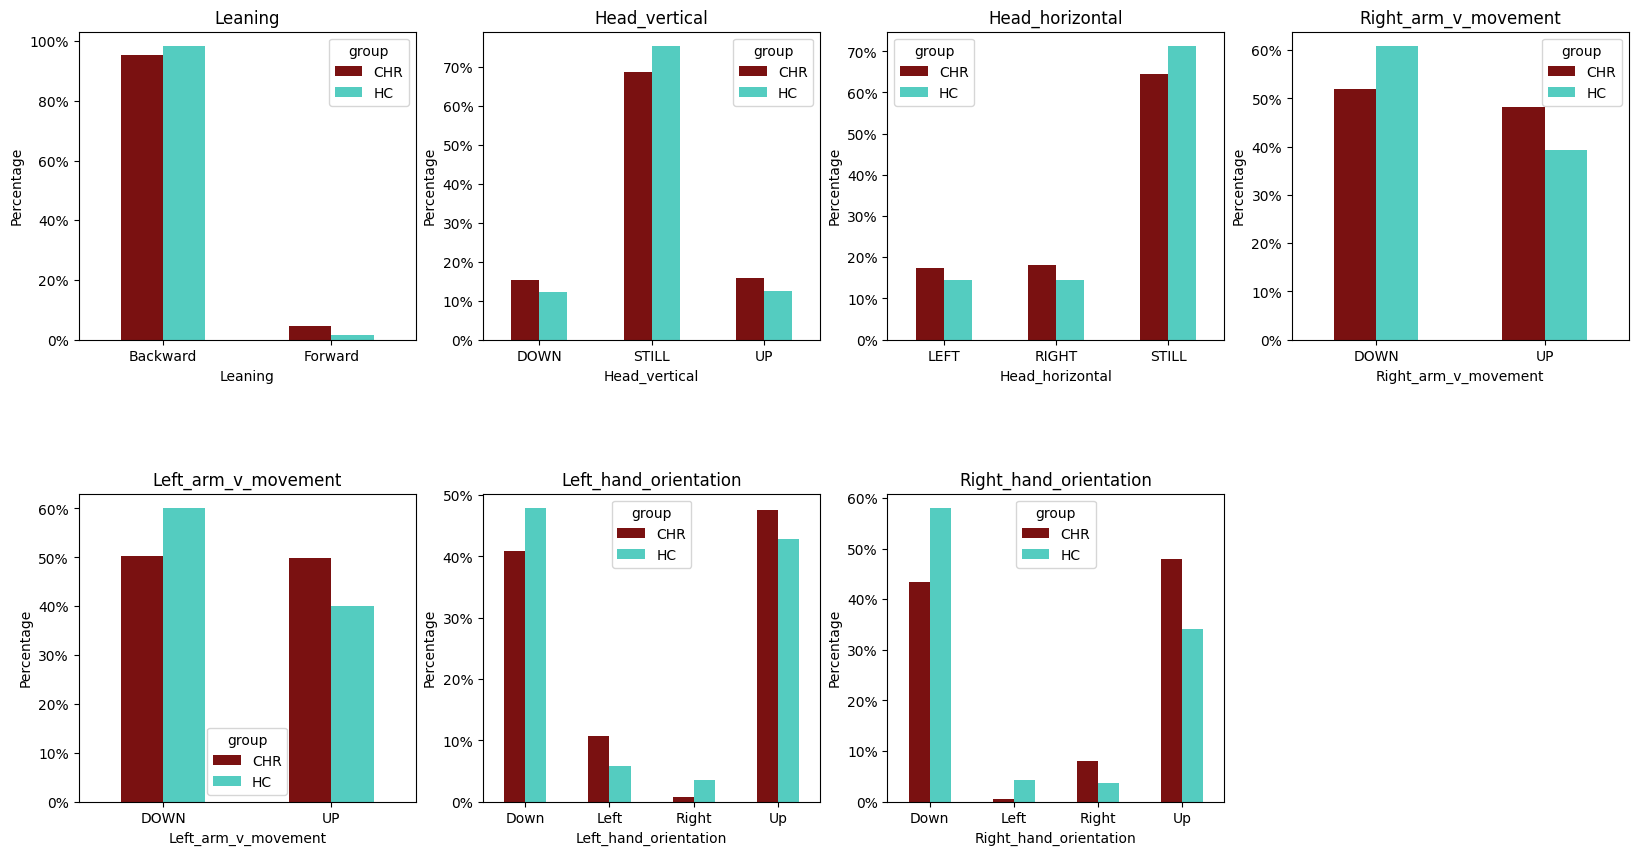

In [275]:
import math
import matplotlib.ticker as ticker

# Define the categorical features to analyze
categorical_features = ['leaning', 'head_vertical', 'head_horizontal', 'right_arm_v_movement',
                        'left_arm_v_movement', 'left_hand_orientation', 'right_hand_orientation']

# Calculate the number of rows and columns for subplots
num_features = len(categorical_features)
num_cols = 4
num_rows = math.ceil(num_features / num_cols)

# Calculate the number of blank subplots
num_blank_subplots = num_rows * num_cols - num_features

# Create subplots for each categorical feature
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Iterate over each categorical feature
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols

    # Group data by group and feature count, and calculate the average count for each category within each group
    grouped_df = combined_df.groupby(['group', feature]).size().reset_index(name='count')
    avg_grouped_df = grouped_df.groupby(['group', feature])['count'].mean().reset_index(name='avg_count')

    # Calculate the total count for each group
    total_count_df = grouped_df.groupby('group')['count'].sum().reset_index(name='total_count')

    # Merge the average count and total count dataframes
    avg_grouped_df = avg_grouped_df.merge(total_count_df, on='group')

    # Calculate the percentage values
    avg_grouped_df['percentage'] = avg_grouped_df['avg_count'] / avg_grouped_df['total_count'] * 100

    # Plot average frequency distribution by group
    sns.barplot(data=avg_grouped_df, x=feature, y='percentage', hue='group', ax=axes[row, col],
                palette={'CHR': 'darkred', 'HC': 'turquoise'}, width=0.5)  # Specify the colors for CHR and HC groups
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].set_ylabel('Percentage')
    axes[row, col].set_title(f'{feature.capitalize()}')
    axes[row, col].set_ylim(0, None)  # Set the y-axis limits

    # Set the y-axis labels as percentages
    axes[row, col].yaxis.set_major_formatter(ticker.PercentFormatter())

# Remove the extra blank subplots
if num_blank_subplots > 0:
    for i in range(num_blank_subplots):
        fig.delaxes(axes[num_rows - 1, num_cols - 1 - i])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


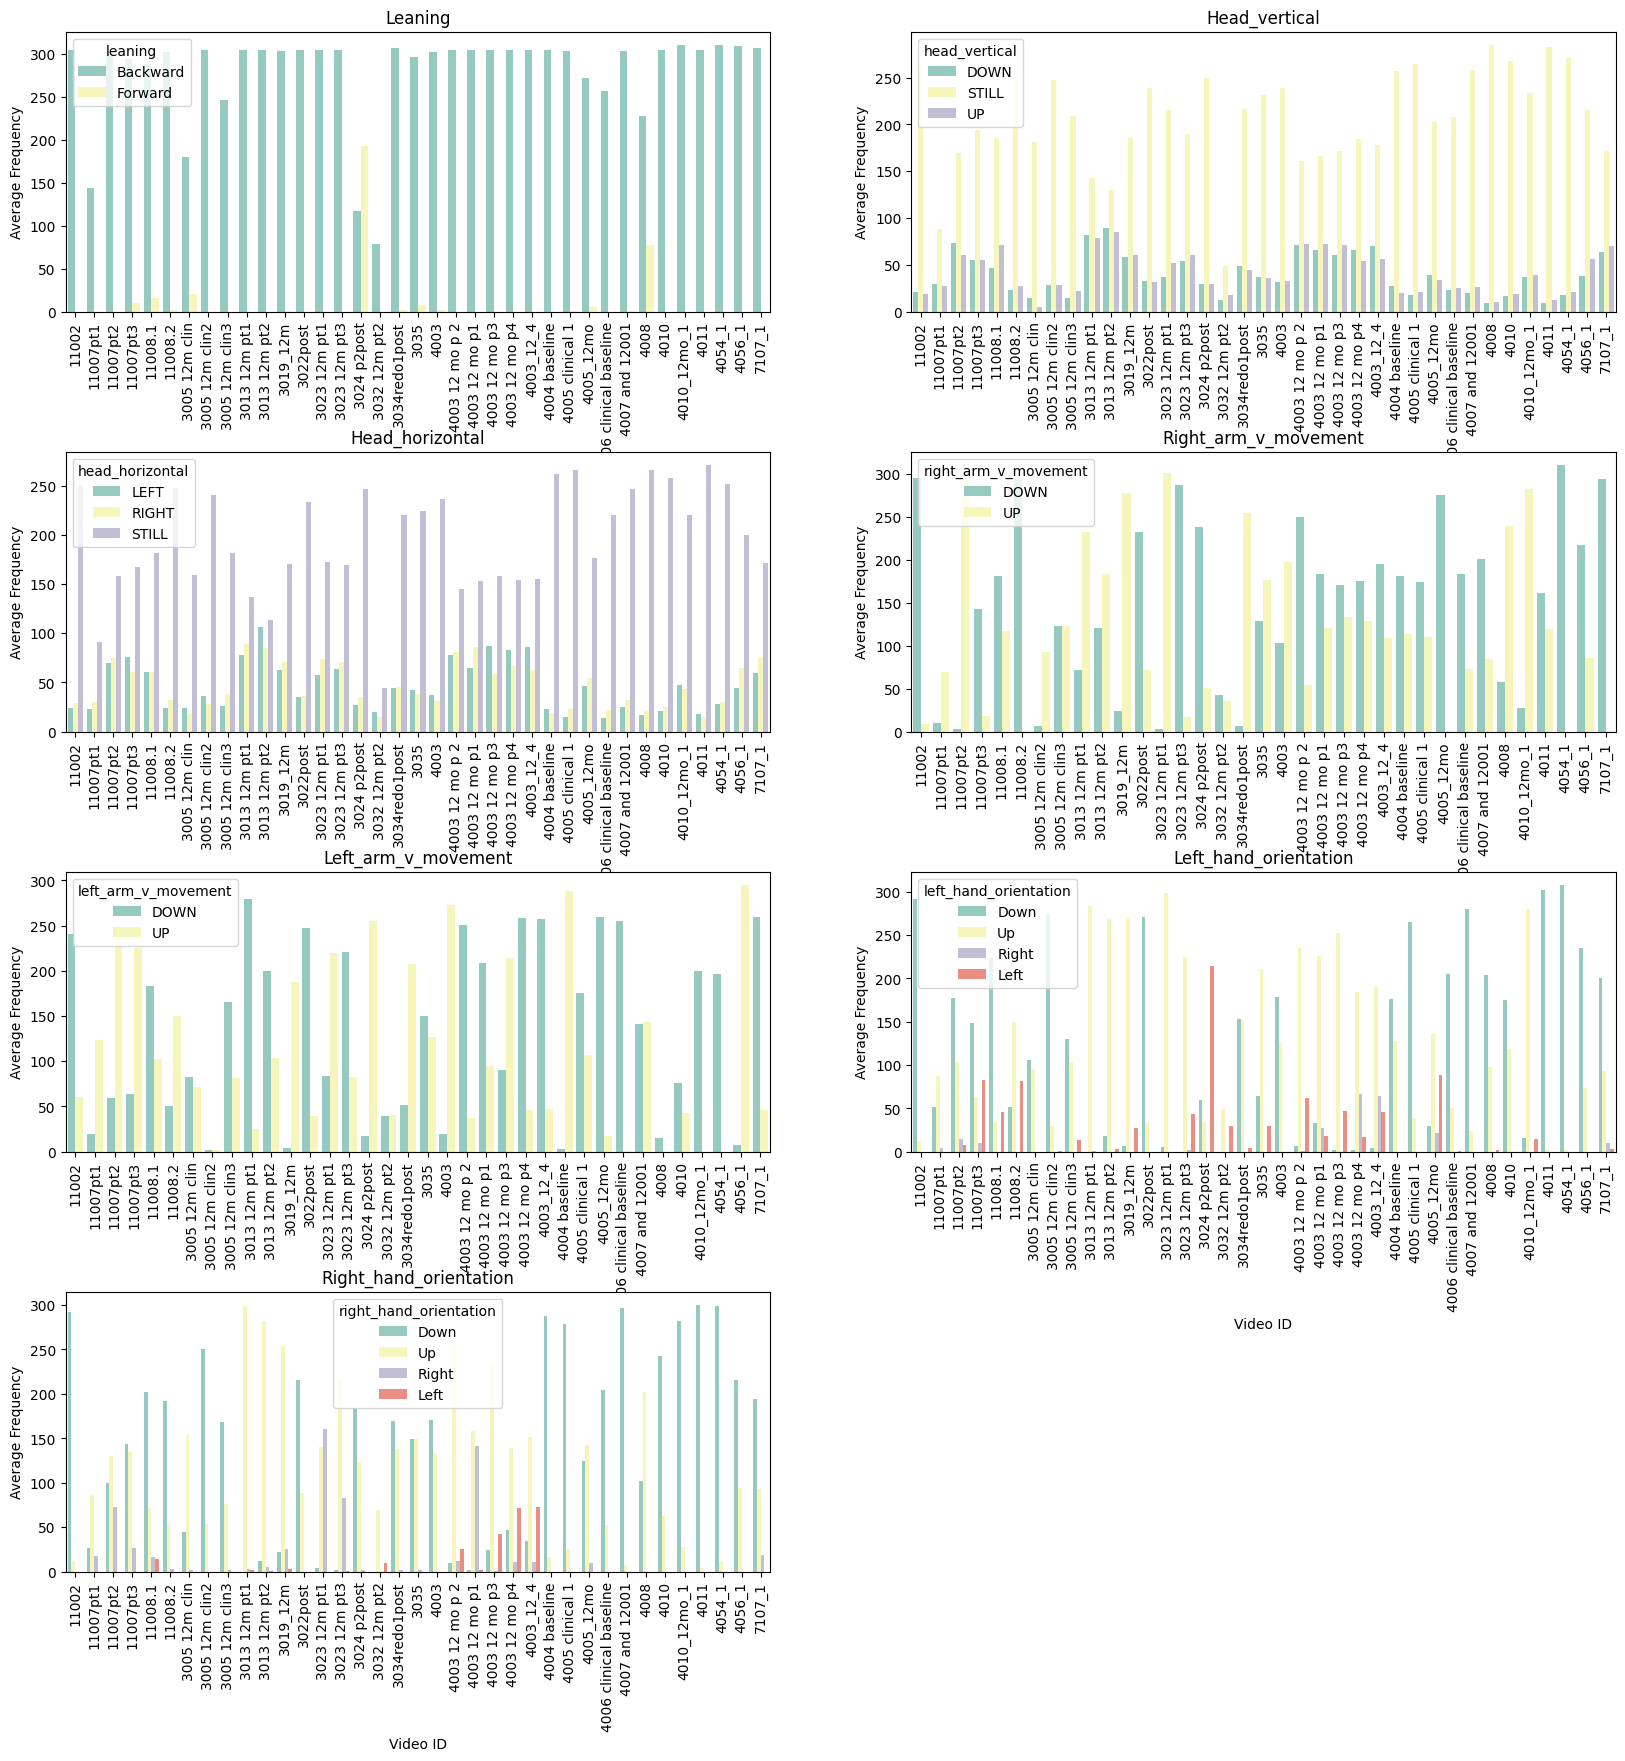

In [276]:
# Define the categorical features to analyze
categorical_features = ['leaning', 'head_vertical', 'head_horizontal', 'right_arm_v_movement',
                        'left_arm_v_movement', 'left_hand_orientation', 'right_hand_orientation']

# Calculate the number of rows and columns for subplots
num_features = len(categorical_features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

# Calculate the number of blank subplots
num_blank_subplots = num_rows * num_cols - num_features

# Create subplots for each categorical feature
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Iterate over each categorical feature
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols

    # Group data by video ID and feature count, and calculate the average count for each category within each video
    grouped_df = combined_df.groupby(['video_id', feature]).size().reset_index(name='count')
    avg_grouped_df = grouped_df.groupby(['video_id', feature])['count'].mean().reset_index(name='avg_count')

    # Plot average frequency distribution by video ID
    sns.barplot(data=avg_grouped_df, x='video_id', y='avg_count', hue=feature, ax=axes[row, col],
                palette='Set3', width=0.8)  # Specify the palette for different categories
    axes[row, col].set_xlabel('Video ID')
    axes[row, col].set_ylabel('Average Frequency')
    axes[row, col].set_title(f'{feature.capitalize()}')
    axes[row, col].set_ylim(0, None)  # Set the y-axis limits
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)  # Rotate x-axis labels vertically

# Remove the extra blank subplots
if num_blank_subplots > 0:
    for i in range(num_blank_subplots):
        fig.delaxes(axes[num_rows - 1, num_cols - 1 - i])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()
